In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting to know the data set

In [2]:
# load data set
df = pd.read_csv("Wisconsin.csv")

# drop patient id from dataset
df.drop('id', axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 31)

In [4]:
labels = ['0', '1']
balance = df.diagnosis.value_counts()
balance

B    357
M    212
Name: diagnosis, dtype: int64

Data set is slightly imbalanced, majority of cells are benign.

In [5]:
balance[0]/balance.sum()

0.62741652021089633

In [6]:
# split into labels Y and instances X
Y = df.values[:, 0]
# 1 is positive => malign => patient has
Y = np.array(list(1. if i=='M' else 0. for i in Y)).astype('float')
X = df.values[:, 1:].astype('float64')
%precision 2
print(Y[0:8])
print(X[0:8, :5])
print(Y.shape, X.shape)

[ 1.  1.  1.  1.  1.  1.  1.  1.]
[[  1.80e+01   1.04e+01   1.23e+02   1.00e+03   1.18e-01]
 [  2.06e+01   1.78e+01   1.33e+02   1.33e+03   8.47e-02]
 [  1.97e+01   2.12e+01   1.30e+02   1.20e+03   1.10e-01]
 [  1.14e+01   2.04e+01   7.76e+01   3.86e+02   1.42e-01]
 [  2.03e+01   1.43e+01   1.35e+02   1.30e+03   1.00e-01]
 [  1.24e+01   1.57e+01   8.26e+01   4.77e+02   1.28e-01]
 [  1.82e+01   2.00e+01   1.20e+02   1.04e+03   9.46e-02]
 [  1.37e+01   2.08e+01   9.02e+01   5.78e+02   1.19e-01]]
(569,) (569, 30)


In [7]:
# balanca data, might be useful later
X_false = X[Y==0]
X_true = X[Y==1]
X_true.shape
X_balanced = np.concatenate([X_false[0:212], X_true])
Y_balanced = np.array(212*[0]+212*[1])

X_balanced.shape, Y_balanced.shape

((424, 30), (424,))

## Exploratory Data Analysis

### Random Scatter

In [18]:
lim = X.shape[1]
a = np.stack(np.meshgrid(np.arange(0,lim), np.arange(0,lim)), -1).reshape(-1, 2)
a = np.array([i for i in a if i[0] != i[1]])
np.random.seed(636)
inds = np.random.choice(range(0, len(a)), size=16)
a = a[inds]

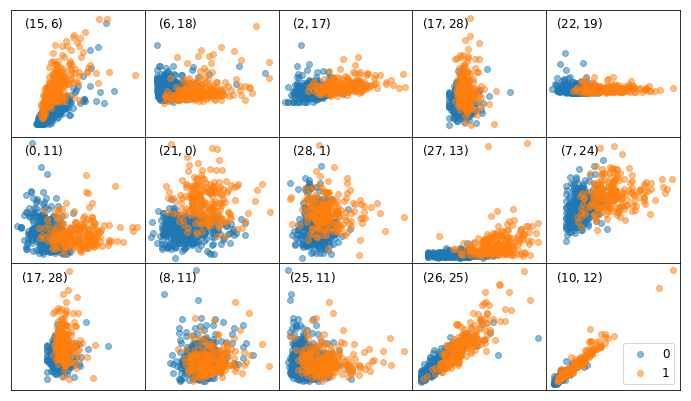

In [20]:
plt.figure(figsize=(12,7))
plt.rcParams.update({'font.size': 12})

for i in range(0,15):
    fig = plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    
    for j, label in enumerate(labels):
        plt.scatter(X[Y==j, a[i,0]], X[Y == j, a[i,1]], alpha=.5,
                    label=label)
    plt.text(0.25,0.9, "$({}, {})$".format(a[i,0],a[i,1]),
         horizontalalignment='center',
         verticalalignment='center',
         transform = plt.gca().transAxes)
    if i == 14:
        plt.legend(labels, loc='lower right')
    
plt.subplots_adjust(wspace=0, hspace=0)    
plt.savefig('figs/random_scatter.pdf', bbox_inches='tight')

### PCA

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

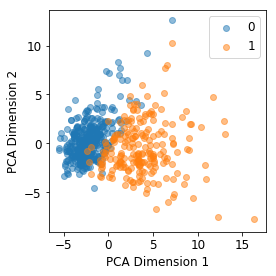

In [22]:
# http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html
from sklearn.decomposition import PCA

pca = PCA(n_components=10).fit(X_scaled)
Xp = pca.transform(X_scaled)

plt.figure(figsize=(4,4))
for i, label in enumerate(labels):
    plt.scatter(Xp[Y==i, 0], Xp[Y == i, 1], alpha=.5,
                label=label)

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.legend()
plt.savefig("figs/pca_1.pdf")

[(1, 0.44),
 (2, 0.63),
 (3, 0.73),
 (4, 0.79),
 (5, 0.85),
 (6, 0.89),
 (7, 0.91),
 (8, 0.93),
 (9, 0.94),
 (10, 0.95)]

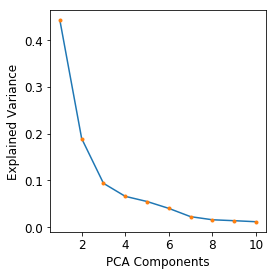

In [23]:
plt.figure(figsize=(4,4))
plt.plot(np.arange(1,11), pca.explained_variance_ratio_)
plt.plot(np.arange(1,11), pca.explained_variance_ratio_, '.')

#plt.plot(np.arange(1,11), np.cumsum(pca.explained_variance_ratio_))
#plt.plot(np.arange(1,11), np.cumsum(pca.explained_variance_ratio_), '.')

pca.explained_variance_[0:4]
plt.xlabel(r'PCA Components')
plt.ylabel('Explained Variance')
plt.tight_layout()
plt.savefig("figs/pca_2.pdf")
list(zip(np.arange(1,10+1),np.cumsum(pca.explained_variance_ratio_)))

6 components explain 89 percent of the variance.

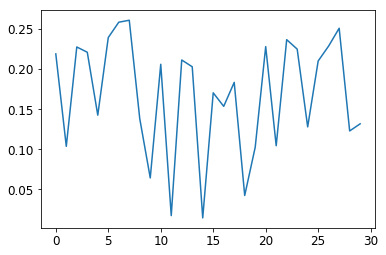

In [46]:
max_vec = pca.components_[0,:] 
plt.plot(max_vec)
max_props = np.argsort(max_vec)[::-1][0:10]

In [47]:
# list components with maximal contribution to first component
[(list(df)[prop],prop) for prop in max_props]

[('concavity_mean', 7),
 ('compactness_mean', 6),
 ('concavity_worst', 27),
 ('smoothness_mean', 5),
 ('texture_worst', 22),
 ('compactness_worst', 26),
 ('fractal_dimension_se', 20),
 ('texture_mean', 2),
 ('perimeter_worst', 23),
 ('perimeter_mean', 3)]

In [49]:
V = pca.components_[0:2, [max_props[0],max_props[1]]]
print(pca.components_.shape)
print(V)

(10, 30)
[[ 0.26  0.26]
 [-0.03  0.06]]


In [50]:
# check orthogonality of components (over all 30 dimensions)
np.dot(pca.components_[1,:], pca.components_[0,:])

0.00

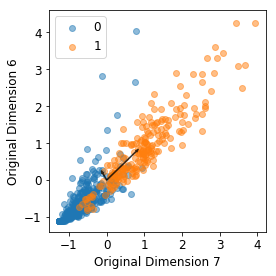

In [51]:
plt.figure(figsize=(4,4))
for i, label in enumerate(labels):
    plt.scatter(X_scaled[Y==i, max_props[0]], X_scaled[Y == i, max_props[1]], alpha=.5,
                label=label)

# scale arrows for visibility
s = 3
plt.arrow(0, 0, s*V[0, 0], s*V[0, 1] , fc='k', ec='k', width = .02, alpha=0.6)
plt.arrow(0, 0, s*V[1, 0], s*V[1, 1] , fc='k', ec='k', width = .02, alpha=0.6)
plt.xlabel('Original Dimension {}'.format(max_props[0]))
plt.ylabel('Original Dimension {}'.format(max_props[1]))
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("figs/pca_3.pdf")

## Nearest Neighbor Classifier

In [52]:
from sklearn import datasets, neighbors, svm, preprocessing
from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import make_pipeline

In [104]:
# 10 fold cross validation
# see http://scikit-learn.org/stable/modules/cross_validation.html
# and http://scikit-learn.org/stable/modules/model_evaluation.html
def cross_validate_with_statistics(classifier, X, Y):

    score_list = ['precision', 'recall', 'accuracy']
    scores = cross_validate(classifier, X, Y, 
                            cv=KFold(10, shuffle=True, random_state=42), 
                            scoring=score_list, return_train_score=True,
                            )
    
    # get mean and std of 
    means = {s:np.mean(scores[s]) for s in scores}
    stds = {s:np.std(scores[s]) for s in scores}

    return means, stds

In [54]:
def nearest_neighbor(X, Y):
    # instantiate nearest neighbor classifier
    nn = neighbors.KNeighborsClassifier(n_neighbors=1, algorithm='brute')
    # standardise data to 0 mean and 1 variance
    nn = make_pipeline(preprocessing.StandardScaler(), nn)
    nn_means, nn_stds = cross_validate_with_statistics(nn, X, Y)

    return nn_means, nn_stds

nearest_neighbor(X_balanced, Y_balanced)

({'fit_time': 0.00,
  'score_time': 0.00,
  'test_accuracy': 0.94,
  'test_f1': 0.94,
  'test_precision': 0.94,
  'test_recall': 0.94,
  'train_accuracy': 1.00,
  'train_f1': 1.00,
  'train_precision': 1.00,
  'train_recall': 1.00},
 {'fit_time': 0.00,
  'score_time': 0.00,
  'test_accuracy': 0.03,
  'test_f1': 0.03,
  'test_precision': 0.05,
  'test_recall': 0.06,
  'train_accuracy': 0.00,
  'train_f1': 0.00,
  'train_precision': 0.00,
  'train_recall': 0.00})

As always with NN, training error is 0.

In [191]:
# now do k nearest neighbour
def k_nearest_neighbor(X, Y, ks):
    
    # for each k, [accuracy, precision, and recall] as mean and std
    scores_knn = np.zeros((len(ks), 3, 2))
    for i, k in enumerate(ks):
        # instantiate nearest neighbor classifier
        knn = neighbors.KNeighborsClassifier(n_neighbors=k, algorithm='brute',
                                            metric='euclidean',
                                            weights='uniform')
        # standardise data to 0 mean and 1 variance
        knn = make_pipeline(preprocessing.StandardScaler(), knn)
        means_knn, stds_knn = cross_validate_with_statistics(knn, X, Y)
    
        scores_knn[i, 0, 0] = means_knn['test_accuracy']
        scores_knn[i, 1, 0] = means_knn['test_precision']
        scores_knn[i, 2, 0] = means_knn['test_recall'] 

        scores_knn[i, 0, 1] = stds_knn['test_accuracy']
        scores_knn[i, 1, 1] = stds_knn['test_precision']
        scores_knn[i, 2, 1] = stds_knn['test_recall']
    
    return scores_knn

In [192]:
def knn_plot(knn_res, s):
    from matplotlib.ticker import FormatStrFormatter
    # precision recall plot
    # recall
    xpl = knn_res[:,2,0]
    # precision
    ypl = knn_res[:,1,0]

    xerr = knn_res[:,2,1]
    yerr = knn_res[:,1,1]

    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    plt.errorbar(xpl, ypl, yerr, xerr, fmt='none', alpha=0.3, elinewidth=0.5)

    plt.scatter(xpl, ypl, c=ks, label='k-NN')
    plt.colorbar(format=FormatStrFormatter('%i'), label='$k$')

    plt.plot([0,0.9999,1],[1,1,0], label='ideal', c='gray', alpha=0.8, linewidth=0.5)

    plt.annotate(r"$k={}$".format(ks[0]), (xpl[0]-0.02, ypl[0]-0.009))
    plt.annotate(r"$k={}$".format(ks[-1]), (xpl[-1]-0.02, ypl[-1]-0.009))

    # this line always needs to be updated depending on which N is used!
    plt.plot([0,1], 2*[balance[1]/balance.sum()], label='guessing', alpha=0.4)

    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.ylim(0.9, 1.005)
    plt.xlim(0.4, 1.01)
    plt.tight_layout()
    plt.savefig('figs/'+s+'.pdf')

In [193]:
ks = list(range(1,10+1)) + [20, 40, 50, 100, 150, 200, 250, 300]
knn_res = k_nearest_neighbor(X, Y, ks)

# means
print("k, accuracy, precision, recall")
list((zip(ks, knn_res[:,:,0])))

k, accuracy, precision, recall


[(1, array([ 0.95,  0.93,  0.91])),
 (2, array([ 0.95,  0.99,  0.88])),
 (3, array([ 0.96,  0.98,  0.91])),
 (4, array([ 0.96,  0.99,  0.9 ])),
 (5, array([ 0.96,  0.98,  0.92])),
 (6, array([ 0.96,  0.99,  0.91])),
 (7, array([ 0.96,  0.98,  0.92])),
 (8, array([ 0.96,  0.99,  0.91])),
 (9, array([ 0.97,  0.99,  0.93])),
 (10, array([ 0.97,  0.99,  0.93])),
 (20, array([ 0.95,  0.99,  0.89])),
 (40, array([ 0.95,  0.99,  0.87])),
 (50, array([ 0.95,  0.99,  0.87])),
 (100, array([ 0.93,  0.98,  0.83])),
 (150, array([ 0.91,  0.98,  0.78])),
 (200, array([ 0.9 ,  0.99,  0.74])),
 (250, array([ 0.86,  0.98,  0.63])),
 (300, array([ 0.82,  1.  ,  0.52]))]

In [194]:
# standard deviations
list((zip(ks, knn_res[:,:,1])))

[(1, array([ 0.01,  0.03,  0.03])),
 (2, array([ 0.02,  0.02,  0.06])),
 (3, array([ 0.02,  0.04,  0.05])),
 (4, array([ 0.02,  0.02,  0.06])),
 (5, array([ 0.03,  0.04,  0.07])),
 (6, array([ 0.03,  0.04,  0.07])),
 (7, array([ 0.02,  0.04,  0.05])),
 (8, array([ 0.02,  0.04,  0.06])),
 (9, array([ 0.02,  0.03,  0.05])),
 (10, array([ 0.02,  0.03,  0.05])),
 (20, array([ 0.02,  0.04,  0.06])),
 (40, array([ 0.02,  0.02,  0.05])),
 (50, array([ 0.02,  0.02,  0.05])),
 (100, array([ 0.02,  0.03,  0.06])),
 (150, array([ 0.03,  0.03,  0.06])),
 (200, array([ 0.02,  0.03,  0.05])),
 (250, array([ 0.02,  0.03,  0.05])),
 (300, array([ 0.05,  0.  ,  0.08]))]

In [146]:
# high precision value = there are no false positives. when algorithm says an instance is positive, it is
# low recall value = not all positives are found.
# we likely stop predicting positives all together at high k, because of imbalance in data set
# k ~ N -> we just predict the majority class. which is negative ->> dont predict positives

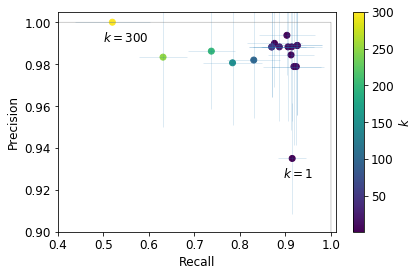

In [195]:
knn_plot(knn_res, 'knn')

In [197]:
# I checked that balancing does not really yield a difference
# knn_res = k_nearest_neighbor(X_balanced, Y_balanced, ks)
# knn_plot(knn_res, 'knn_bal')

In [205]:
# do NN in the first 6 dimensions of PCA space
ks = list(range(1,10+1)) + [20, 40, 50, 100, 150, 200]
knn_res = k_nearest_neighbor(Xp[:,:4], Y, ks)

# means
print("k, accuracy, precision, recall")
list((zip(ks, knn_res[:,:,0])))

k, accuracy, precision, recall


[(1, array([ 0.94,  0.92,  0.91])),
 (2, array([ 0.93,  0.98,  0.83])),
 (3, array([ 0.95,  0.95,  0.91])),
 (4, array([ 0.94,  0.97,  0.87])),
 (5, array([ 0.94,  0.95,  0.89])),
 (6, array([ 0.94,  0.97,  0.86])),
 (7, array([ 0.95,  0.96,  0.89])),
 (8, array([ 0.94,  0.96,  0.86])),
 (9, array([ 0.94,  0.95,  0.89])),
 (10, array([ 0.94,  0.98,  0.87])),
 (20, array([ 0.94,  0.97,  0.85])),
 (40, array([ 0.93,  0.99,  0.82])),
 (50, array([ 0.93,  0.99,  0.81])),
 (100, array([ 0.89,  1.  ,  0.71])),
 (150, array([ 0.86,  1.  ,  0.61])),
 (200, array([ 0.8 ,  1.  ,  0.46]))]

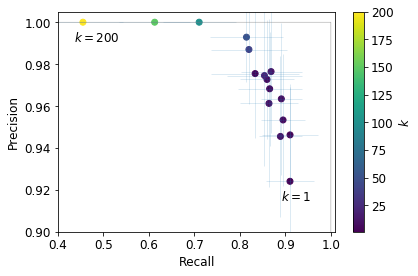

In [206]:
knn_plot(knn_res, 'knn_pca')